##### This notebook is divided into three sections, each constituiting a workflow on its own.

#### Part 1 : Data Understanding and Preprocessing
#### Part 2 : Exploratory Data Analysis
#### Part 3 : Insights and Recommendations

### Setup

### Library import

#### Import all the required python libraries

In [1]:
#local libraries for system runtime
import time, datetime, math, warnings
warnings.filterwarnings ("ignore")

#Data Manipulation
import pandas as pd
import numpy as np

#Data Visualization
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline

## Data Cleaning and Preprocessing 

In [2]:
#Reading the dataset

med_data = pd.read_csv("Data.csv")

In [3]:
#Printing the first 10 rows of dataset

med_data.head(10)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589980e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262960e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679510e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841190e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
5,9.598510e+13,5626772,F,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,REPÚBLICA,0,1,0,0,0,0,No
6,7.336880e+14,5630279,F,2016-04-27T15:05:12Z,2016-04-29T00:00:00Z,23,GOIABEIRAS,0,0,0,0,0,0,Yes
7,3.449830e+12,5630575,F,2016-04-27T15:39:58Z,2016-04-29T00:00:00Z,39,GOIABEIRAS,0,0,0,0,0,0,Yes
8,5.639470e+13,5638447,F,2016-04-29T08:02:16Z,2016-04-29T00:00:00Z,21,ANDORINHAS,0,0,0,0,0,0,No
9,7.812460e+13,5629123,F,2016-04-27T12:48:25Z,2016-04-29T00:00:00Z,19,CONQUISTA,0,0,0,0,0,0,No


In [4]:
#How many records and columns are present?

med_data.shape

(110527, 14)

In [5]:
#Are there any columns with missing value?

med_data.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [6]:
# Are there any duplicated records?

med_data.duplicated().sum()

0

In [7]:
#what are the attributes of the dataframe's columns?

med_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


###### The "ScheduledDay" and "AppointmentDay" are in object type and consist of datetime value. As we do not need the hour, minutes, and seconds, They should be changed to date only, including data type.

In [8]:
# Modifying the date and time into standard form

med_data["ScheduledDay"] = pd.to_datetime(med_data["ScheduledDay"]).dt.date.astype("datetime64[ns]")

med_data["AppointmentDay"] = pd.to_datetime(med_data["AppointmentDay"]).dt.date.astype("datetime64[ns]")

med_data.head(3)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589980e+14,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262960e+12,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No


In [9]:
# Adding a new column to view schedules and appointment across week days.

med_data["Schedule_dayW"] = med_data["ScheduledDay"].dt.day_name()

med_data["Appointment_dayW"] = med_data["AppointmentDay"].dt.day_name()

med_data

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,Schedule_dayW,Appointment_dayW
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,Friday,Friday
1,5.589980e+14,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,Friday,Friday
2,4.262960e+12,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,Friday,Friday
3,8.679510e+11,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,Friday,Friday
4,8.841190e+12,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,Friday,Friday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572130e+12,5651768,F,2016-05-03,2016-06-07,56,MARIA ORTIZ,0,0,0,0,0,1,No,Tuesday,Tuesday
110523,3.596270e+12,5650093,F,2016-05-03,2016-06-07,51,MARIA ORTIZ,0,0,0,0,0,1,No,Tuesday,Tuesday
110524,1.557660e+13,5630692,F,2016-04-27,2016-06-07,21,MARIA ORTIZ,0,0,0,0,0,1,No,Wednesday,Tuesday
110525,9.213490e+13,5630323,F,2016-04-27,2016-06-07,38,MARIA ORTIZ,0,0,0,0,0,1,No,Wednesday,Tuesday


In [10]:
#0- Monday to 6- Sunday

med_data["AppointmentDay"].dt.weekday

0         4
1         4
2         4
3         4
4         4
         ..
110522    1
110523    1
110524    1
110525    1
110526    1
Name: AppointmentDay, Length: 110527, dtype: int64

In [11]:
med_data["Scheduled_month"] = med_data["ScheduledDay"].dt.month_name()

med_data["Appointment_month"] = med_data["AppointmentDay"].dt.month_name()

med_data.head(3)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,Schedule_dayW,Appointment_dayW,Scheduled_month,Appointment_month
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,Friday,Friday,April,April
1,5.589980e+14,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,Friday,Friday,April,April
2,4.262960e+12,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,Friday,Friday,April,April


In [12]:
# Viewing the data columns

med_data.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show',
       'Schedule_dayW', 'Appointment_dayW', 'Scheduled_month',
       'Appointment_month'],
      dtype='object')

##### Some of the column names are wrongly spelt. They need to be corrected.

In [13]:
# Correcting names of some column

med_data = med_data.rename(columns = {"Hipertension" : "Hypertension", "Handcap" : "Handicap",
                                      "SMS_received" : "SMSReceived", "No-show" : "NoShow"})

med_data.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hypertension',
       'Diabetes', 'Alcoholism', 'Handicap', 'SMSReceived', 'NoShow',
       'Schedule_dayW', 'Appointment_dayW', 'Scheduled_month',
       'Appointment_month'],
      dtype='object')

In [14]:
# Printing the Gender column values

med_data["Gender"]

0         F
1         M
2         F
3         F
4         F
         ..
110522    F
110523    F
110524    F
110525    F
110526    F
Name: Gender, Length: 110527, dtype: object

##### The Gender column should have a more specific data value

In [15]:
# Replacing M and F as Male and Female respectively

med_data["Gender"] = med_data["Gender"].replace(["M", "F"],["Male", "Female"])
med_data["Gender"]

0         Female
1           Male
2         Female
3         Female
4         Female
           ...  
110522    Female
110523    Female
110524    Female
110525    Female
110526    Female
Name: Gender, Length: 110527, dtype: object

In [16]:
# Dropping columns with no importance

med_data.drop(["PatientId","AppointmentID", "Neighbourhood"], axis = 1, inplace = True)

In [17]:
med_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   Gender             110527 non-null  object        
 1   ScheduledDay       110527 non-null  datetime64[ns]
 2   AppointmentDay     110527 non-null  datetime64[ns]
 3   Age                110527 non-null  int64         
 4   Scholarship        110527 non-null  int64         
 5   Hypertension       110527 non-null  int64         
 6   Diabetes           110527 non-null  int64         
 7   Alcoholism         110527 non-null  int64         
 8   Handicap           110527 non-null  int64         
 9   SMSReceived        110527 non-null  int64         
 10  NoShow             110527 non-null  object        
 11  Schedule_dayW      110527 non-null  object        
 12  Appointment_dayW   110527 non-null  object        
 13  Scheduled_month    110527 non-null  object  

## Exploratory Data Analysis and Data Visualization 

In [18]:
# Understanding the statistical description of the numerical columns within dataset

med_data.describe()

,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived
count,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [19]:
# Understanding the statistical description of the categorical variables in the dataset

med_data.describe(include = [object])

,Gender,NoShow,Schedule_dayW,Appointment_dayW,Scheduled_month,Appointment_month
count,110527,110527,110527,110527,110527,110527
unique,2,2,6,6,8,3
top,Female,No,Tuesday,Wednesday,May,May
freq,71840,88208,26168,25867,67421,80841


### Univariate Analysis

#### What is the distribution of people in showing up for their medical apointment?

In [20]:
#Target Variable : NoShow

med_data["NoShow"].value_counts()

No     88208
Yes    22319
Name: NoShow, dtype: int64

Text(0.5, 1.02, 'Did you show up for appointment?')

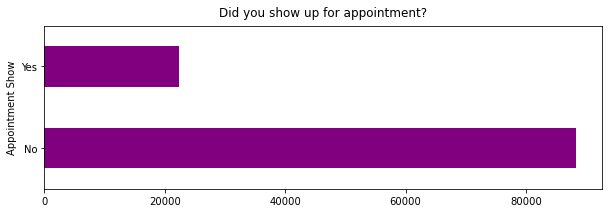

In [21]:
plt.figure(figsize = (10,3))
med_data["NoShow"].value_counts().plot(kind = "barh", xlabel = "Appointment Show", ylabel = "Count", color = "purple")
plt.title("Did you show up for appointment?", y = 1.02)

In [22]:
# Calculating the percentage of showing up for apppappointments or not

100 *(med_data["NoShow"].value_counts()/len(med_data["NoShow"]))

No     79.806744
Yes    20.193256
Name: NoShow, dtype: float64

In [23]:
med_data["Age"].max()

115

#### What is the distribution of the patients according to their age?

In [24]:
# We need to group the age into intervals.

labels = ["{0} - {1}".format(i, i + 20) for i in range(1, 118, 20)]

med_data["Age_group"] = pd.cut(med_data["Age"], range(1, 130, 20), right = False, labels = labels)

med_data

,Gender,ScheduledDay,AppointmentDay,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived,NoShow,Schedule_dayW,Appointment_dayW,Scheduled_month,Appointment_month,Age_group
0,Female,2016-04-29,2016-04-29,62,0,1,0,0,0,0,No,Friday,Friday,April,April,61 - 81
1,Male,2016-04-29,2016-04-29,56,0,0,0,0,0,0,No,Friday,Friday,April,April,41 - 61
2,Female,2016-04-29,2016-04-29,62,0,0,0,0,0,0,No,Friday,Friday,April,April,61 - 81
3,Female,2016-04-29,2016-04-29,8,0,0,0,0,0,0,No,Friday,Friday,April,April,1 - 21
4,Female,2016-04-29,2016-04-29,56,0,1,1,0,0,0,No,Friday,Friday,April,April,41 - 61
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,Female,2016-05-03,2016-06-07,56,0,0,0,0,0,1,No,Tuesday,Tuesday,May,June,41 - 61
110523,Female,2016-05-03,2016-06-07,51,0,0,0,0,0,1,No,Tuesday,Tuesday,May,June,41 - 61
110524,Female,2016-04-27,2016-06-07,21,0,0,0,0,0,1,No,Wednesday,Tuesday,April,June,21 - 41
110525,Female,2016-04-27,2016-06-07,38,0,0,0,0,0,1,No,Wednesday,Tuesday,April,June,21 - 41


In [25]:
med_data["Age_group"].value_counts()

41 - 61      30081
21 - 41      28835
1 - 21       28309
61 - 81      16910
81 - 101      2845
101 - 121        7
Name: Age_group, dtype: int64

Text(0.5, 1.0, 'Which age group dominates the medical appointment list?')

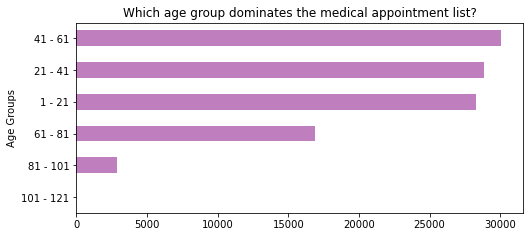

In [26]:
plt.figure(figsize = (8,3.5))
med_data["Age_group"].value_counts().sort_values( ascending = True).plot(
           kind = "barh", xlabel ="Age Groups", ylabel = "patients count", color = "purple", alpha = 0.5)
plt.title("Which age group dominates the medical appointment list?", y = 1.0)

#### What is the gender distribution of the patients?

In [27]:
med_data["Gender"].value_counts(). sort_values(ascending = False)

Female    71840
Male      38687
Name: Gender, dtype: int64

Text(0.5, 1.0, 'Gender Distribution')

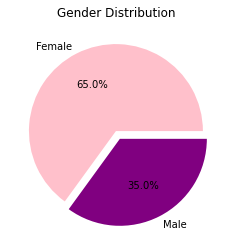

In [28]:
color = ["pink", "purple"]

med_data["Gender"].value_counts().plot(kind = "pie", autopct = "%1.1f%%", explode = [0,0.1], colors = color, ylabel = "")
plt.title("Gender Distribution")

##   Bivariate Analysis

####  How is  medical appointment distributed across the disease state?

In [29]:
med_data.groupby("NoShow").sum()["Hypertension"].sort_values(ascending = False)

NoShow
No     18029
Yes     3772
Name: Hypertension, dtype: int64

In [30]:
med_data.groupby("NoShow").sum()["Diabetes"].sort_values(ascending = False)

NoShow
No     6513
Yes    1430
Name: Diabetes, dtype: int64

In [31]:
med_data.groupby("NoShow").sum()["Handicap"].sort_values(ascending = False)

NoShow
No     2006
Yes     453
Name: Handicap, dtype: int64

In [32]:
med_data.groupby("NoShow").sum()["Alcoholism"].sort_values(ascending = False)

NoShow
No     2683
Yes     677
Name: Alcoholism, dtype: int64

Text(0.5, 1.0, 'How many alcoholic patients showed up for appointment?')

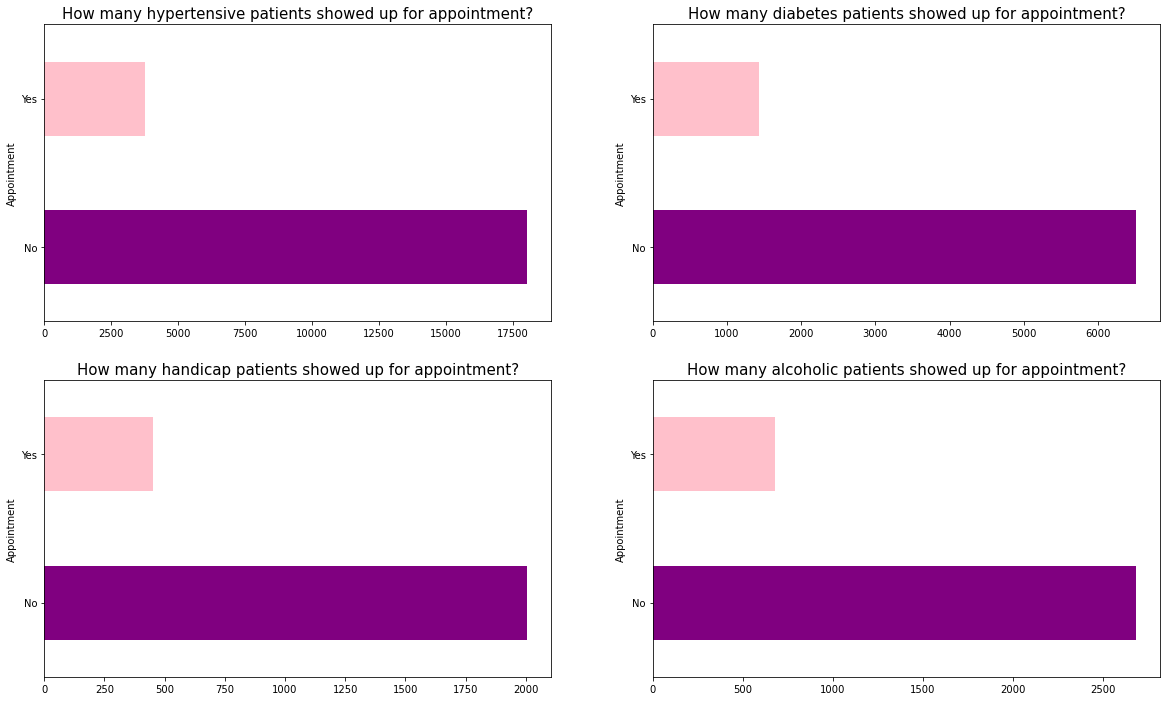

In [33]:
plt.figure(figsize = (20,12))

colors = ("purple", "pink")
plt.subplot(2,2,1)
med_data.groupby("NoShow").sum()["Hypertension"].sort_values(ascending = False).plot(
         kind = "barh", xlabel = "Appointment", ylabel = "Count", color = colors)
plt.title("How many hypertensive patients showed up for appointment?", fontsize = 15)

plt.subplot(2,2,2)
med_data.groupby("NoShow").sum()["Diabetes"].sort_values(ascending = False).plot(
         kind = "barh", xlabel = "Appointment", ylabel = "Count", color = colors)
plt.title("How many diabetes patients showed up for appointment?", fontsize = 15)


plt.subplot(2,2,3)
med_data.groupby("NoShow").sum()["Handicap"].sort_values(ascending = False).plot(
         kind = "barh", xlabel = "Appointment", ylabel = "Count", color = colors)
plt.title("How many handicap patients showed up for appointment?", fontsize = 15)

plt.subplot(2,2,4)
med_data.groupby("NoShow").sum()["Alcoholism"].sort_values(ascending = False).plot(
         kind = "barh", xlabel = "Appointment", ylabel = "Count", color = colors)
plt.title("How many alcoholic patients showed up for appointment?", fontsize = 15)

#### How is appointment distributed across patients age group?

In [34]:
pd.crosstab(med_data["Age_group"], med_data["NoShow"])

NoShow,No,Yes
Age_group,,
1 - 21,21852,6457
21 - 41,22209,6626
41 - 61,24490,5591
61 - 81,14373,2537
81 - 101,2379,466
101 - 121,4,3


Text(0.5, 1.0, 'Which Patients age group are likely to show up for appointment?')

<Figure size 720x216 with 0 Axes>

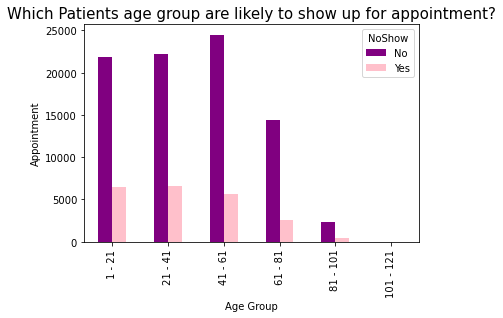

In [35]:
plt.figure(figsize = (10,3))

plot = pd.crosstab(med_data["Age_group"], med_data["NoShow"])
colors = ("purple" ,"pink")
plot.plot.bar(xlabel = "Age Group", ylabel = "Appointment", color = colors)

plt.title("Which Patients age group are likely to show up for appointment?", fontsize = 15)

#### How did patients show up for appointments after receiving SMS?

In [36]:
pd.crosstab(med_data["SMSReceived"],med_data["NoShow"])

NoShow,No,Yes
SMSReceived,,
0,62510,12535
1,25698,9784


Text(0.5, 1.0, 'What is distribution of appointment show for SMS recieved?')

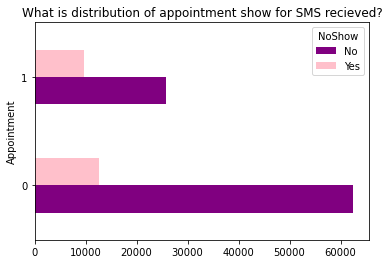

In [37]:
sms = pd.crosstab(med_data["SMSReceived"],med_data["NoShow"])
colors = ("purple","pink")
sms.plot(kind = "barh", color = colors, xlabel = "Appointment", ylabel = "SMS Recieved: 1 - Yes, 0 - No")
plt.title ("What is distribution of appointment show for SMS recieved?")

#### How are patients appointments scheduled and  honored across months and days?

In [38]:
# How many patients were scheduled for appointments on each day?

med_data["Schedule_dayW"].value_counts()

Tuesday      26168
Wednesday    24262
Monday       23085
Friday       18915
Thursday     18073
Saturday        24
Name: Schedule_dayW, dtype: int64

In [39]:
# How many patients came for appointments on each day?

med_data["Appointment_dayW"].value_counts()

Wednesday    25867
Tuesday      25640
Monday       22715
Friday       19019
Thursday     17247
Saturday        39
Name: Appointment_dayW, dtype: int64

Text(0.5, 1.0, 'What month of the year were medical appointment mostly honored')

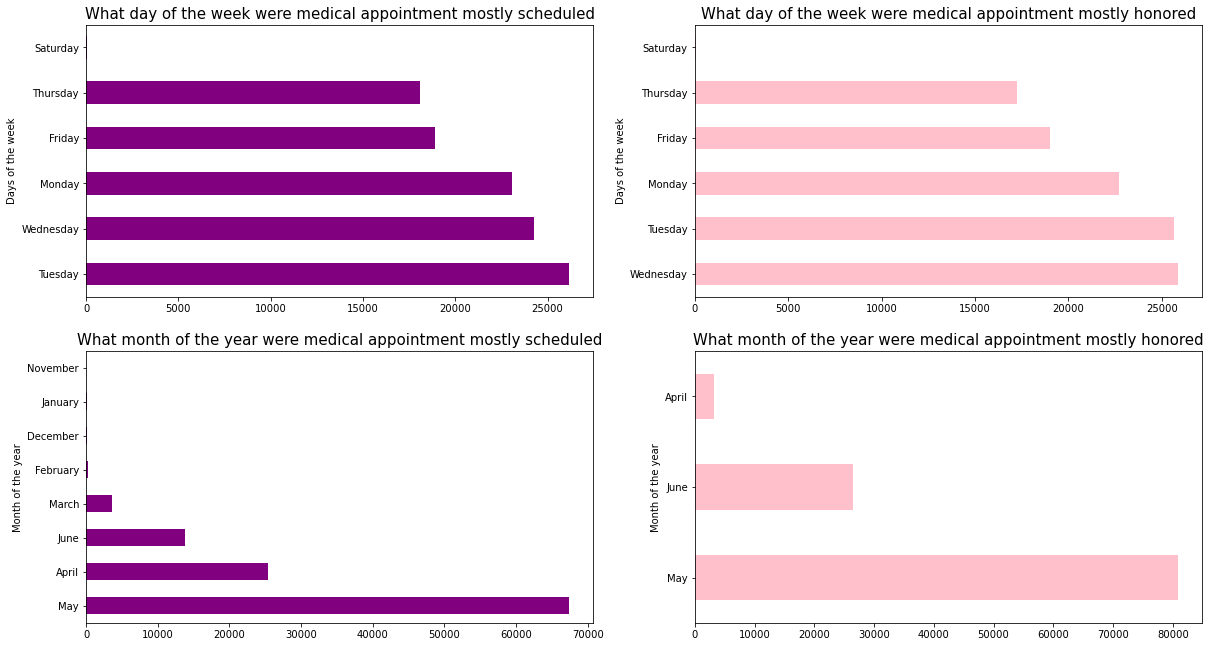

In [40]:
plt.figure(figsize = (20,11))

plt.subplot(2,2,1)
med_data["Schedule_dayW"].value_counts().plot(
      kind = "barh", xlabel ="Days of the week", ylabel = "Count", color = "purple")
plt.title("What day of the week were medical appointment mostly scheduled", fontsize = 15)
    
    
plt.subplot(2,2,2)
med_data["Appointment_dayW"].value_counts().plot(
      kind = "barh", xlabel ="Days of the week", ylabel = "Count", color = "pink")
plt.title("What day of the week were medical appointment mostly honored", fontsize = 15)
    
plt.subplot(2,2,3)
med_data["Scheduled_month"].value_counts().plot(
      kind = "barh", ylabel ="count" ,xlabel = "Month of the year", color = "purple")
plt.title("What month of the year were medical appointment mostly scheduled", fontsize = 15)

    
plt.subplot(2,2,4)
med_data["Appointment_month"].value_counts().plot(
      kind = "barh", ylabel ="count", xlabel = "Month of the year", color = "pink")
plt.title("What month of the year were medical appointment mostly honored", fontsize = 15)
    
    

#### How did patients show up for appointments across days and months?

Text(0.5, 1.0, 'Day of the week VS Medical appointment Show')

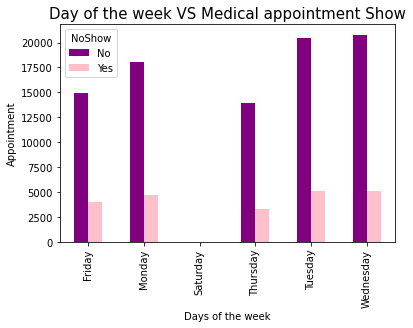

In [41]:
colors = ("purple", "pink")
day = pd.crosstab(med_data["Appointment_dayW"], med_data["NoShow"])
day.plot(kind = "bar", xlabel ="Days of the week", ylabel = "Appointment", color = colors)
plt.title("Day of the week VS Medical appointment Show", fontsize = 15)

Text(0.5, 1.0, 'Month of the year VS Medical appointment Show')

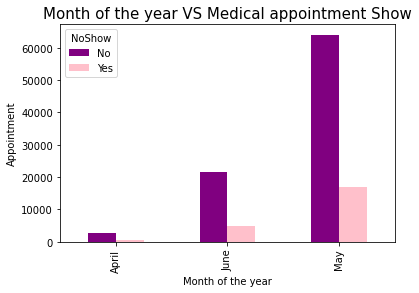

In [42]:
colors = ("purple", "pink")
month = pd.crosstab(med_data["Appointment_month"], med_data["NoShow"])
month.plot(kind = "bar", ylabel ="Appointment", xlabel = "Month of the year", color = colors)
plt.title("Month of the year VS Medical appointment Show", fontsize = 15)

## Findings

1. Female Patients have more appointments than male patients. They lead at 65%.

2. Patients aged between 41-61 have more appointments (30,081) than other aged groups. The least age group with appointments is 81-101 years.

3. Out of 110,527 patient appointments, there are almost 80% show rates and 20% no-show rates.

4. There are 21,801 hypertensive patients, 18,029 have come only for visit while 17% of them has not shown up for appointments.

5. Of a total of 7,943 patients who had diabetes, 82% showed up for appointments, leaving 18% as a no-show.

6. 79.5% of patients suffering from Alcoholism showed up for an appointment and 82% of handicapped patients showed up also.

7. Patients in age 41-61 are more likely to show up for an appointment. This could be because they took the highest proportion of the patient population.

8. 75,045 patients have not received SMS, and about 83% have come for visit. And, from 35,482 who have received SMS, about 72% have come for an appointment.

9. Patients are mostly scheduled for appointments on Tuesdays. However, patients mostly come for appointments on Wednesdays. Within the year, appointments are mostly scheduled in May and patients come around also in May. Sundays have no appointments and Saturdays have minimal appointments in comparison with weekdays.